### Import Libraries

In [1]:
from wrapper_functions_CAR import *
tf.config.run_functions_eagerly(True)
np.random.seed(10)

C:\Users\nickl\anaconda3\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
C:\Users\nickl\anaconda3\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


TensorFlow version: 2.10.0. Expected: 2.7.0
TensorFlow Probability version: 0.18.0. Expected: 0.15.0


### Create the fake data



In [2]:
training2010 = pd.read_csv('../data/merged_wp_census_data2_081122.csv')
county_adj = pd.read_csv('../data/countyadj2.csv', index_col = 0)
models = ['pep', 'worldpop']

In [3]:
data_NY, adj_NY = subset_data_by_state(training2010, county_adj, 'New York', 'NY')

# Default Configs

In [4]:
# MCMC configs.
mcmc_step_size=0.1 # @param
mcmc_sample_size=500 # @param
mcmc_num_steps=10_000 # @param
mcmc_burnin=2_500 # @param
mcmc_nchain=10 # @param
mcmc_seed=0 # @param

DEFAULT_MCMC_CONFIG = dict(step_size=mcmc_step_size, 
                           num_steps=mcmc_sample_size, 
                           burnin=mcmc_burnin, 
                           nchain=mcmc_nchain, 
                           seed=mcmc_seed)

#### Running with HMC

In [5]:
mcmc_config = DEFAULT_MCMC_CONFIG.copy()
mcmc_config.update(dict(burnin = 2_500, num_steps = 12_500, nchain = 5, 
                        kernel_type = 'hmc', step_adaptor_type = 'simple'))
mcmc_config

{'step_size': 0.1,
 'num_steps': 12500,
 'burnin': 2500,
 'nchain': 5,
 'seed': 0,
 'kernel_type': 'hmc',
 'step_adaptor_type': 'simple'}

In [6]:
phi_true, u_true, data = simulate_data(data_NY[:],
                                       adj_NY[:], 
                                       sim_numbers = True,
                                       scale_down = 1,
                                       poisson_noise = False,
                                       pivot = -1, 
                                       one_model = False, 
                                       models = models)

fixing tau2 and rho


In [7]:
t0 = time.perf_counter()
CAR_samples, chain_samples, sampler_stat = run_mcmc_CAR(data = data[:],
                                                        adjacency = adj_NY[:],
                                                        pivot = -1,
                                                        models = models,                                                        
                                                        debug_mode = True,
                                                        num_adaptation_steps = 2000,
                                                        #num_adaptation_steps = 0,
                                                        **mcmc_config)  
print(time.perf_counter() - t0)

fixing tau2 and rho
when adding in tau2 and rho, need to update the likelihood function!
running MAP
0
-111808.09611943123...1000
-111849.7112140425...2000
-111879.49264637714...3000
-111899.43542903262...4000
-111912.31945283334...5000
-111920.3708997132...6000
-111925.11274151695...7000
-111927.67629188139...8000
-111928.96282529115...9000
-111929.60833199261...10000
-111929.98041339043...11000
-111930.26570120348...12000
-111930.56681278424...13000
-111930.95222979352...14000
-111931.45698041553...15000
-111932.07569557754...16000
-111932.77174119368...17000
-111933.4969801411...18000
-111934.21192806683...19000
-111934.89517646209...20000
-111935.53875948983...21000
-111936.14035763335...22000
-111936.70004228655...23000
-111937.21991487425...24000
-111937.7056605928...25000
-111938.16610639259...26000
-111938.60854669947...27000
-111939.03370055152...28000
-111939.43295928702...29000
-111939.78922001134...30000
-111940.08279290056...31000
-111940.2995828883...32000
-111940.4362092

KeyboardInterrupt: 

In [8]:
pivot_fit = -1
pivot_DGP = -1
res_dict = {'CAR_samples': CAR_samples,
            'chain_samples': chain_samples, 
            'sampler_stat': sampler_stat,
            'phi_true': phi_true, 
            'u_true': u_true, 
            'data': data, 
            'adjacency': adj_NY,
            'pivot_fit': pivot_fit,
            'pivot_DGP': pivot_DGP, 
            'models': models,
            'mcmc_config': mcmc_config}

Saving and loading Python objects with Pickle

In [10]:
res_dict['sampler_stat']

(<tf.Tensor: shape=(12500,), dtype=float64, numpy=
 array([0.1       , 0.0990099 , 0.0980296 , ..., 0.01917132, 0.01917132,
        0.01917132])>,
 <tf.Tensor: shape=(12500,), dtype=float64, numpy=
 array([-35.69294573, -12.68302664, -21.26700089, ...,   0.66248923,
         -0.06892971,   0.81076371])>)

In [16]:
import pickle

# using local data file because these are too big for github
#local_dir = 'C:/Users/nickl/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
local_dir = 'C:/Users/Admin-Dell/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
with open(local_dir + 'CAR_samples_NY_n10000_realdata_fl64_2models_June282023.pickle', 'wb') as results_file:
  # pickle.dump([res_dict, mcmc_config], results_file)
  pickle.dump(res_dict, results_file)

### Loading results and analyzing

In [2]:
#local_dir = 'C:/Users/Admin-Dell/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
local_dir = 'C:/Users/nickl/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
file = local_dir + 'CAR_samples_NY_n10000_realdata_fl64_2models_June282023.pickle'
with open(file, "rb") as input_file:
     #CAR_samples, chain_samples, sampler_stat, mcmc_config, phi_true, u_true, data_sub = pickle.load(input_file)
    res_dict = pickle.load(input_file)

In [3]:
res_dict.keys()

dict_keys(['CAR_samples', 'chain_samples', 'sampler_stat', 'phi_true', 'u_true', 'data', 'adjacency', 'pivot_fit', 'pivot_DGP', 'models', 'mcmc_config'])

In [4]:
res_dict['models']

['pep', 'worldpop']

In [9]:
phi1 = res_dict['chain_samples'][0,:]
phi2 = res_dict['chain_samples'][12000,:]
target_log_prob_fn_CAR(phi1), target_log_prob_fn_CAR(phi2)

NameError: name 'target_log_prob_fn_CAR' is not defined

In [10]:
phi1, phi2

(<tf.Tensor: shape=(5, 62, 2), dtype=float64, numpy=
 array([[[-8.16972583e-02, -1.51230727e-02],
         [ 4.92346315e-02,  1.05070296e-01],
         [ 2.13378152e-01,  1.27899545e-02],
         [ 2.19914628e-02, -6.47082518e-02],
         [ 1.99774750e-01, -1.85208294e-02],
         [-1.15820488e-02,  1.12787077e-03],
         [ 1.88453724e-01, -2.67204381e-01],
         [ 2.48529420e-02,  4.76032680e-02],
         [ 6.91812932e-02, -8.50562464e-02],
         [ 2.55426526e-01,  2.46955485e-01],
         [-1.68567054e-01, -2.60312217e-01],
         [ 9.16530562e-02, -5.30881695e-02],
         [-1.62261323e-02, -1.40924823e-01],
         [ 1.49748136e-02, -9.25986184e-02],
         [-2.73685081e-02,  3.71639877e-02],
         [ 9.41230225e-02,  4.27504789e-02],
         [ 3.81636552e-02,  1.53628097e-02],
         [-1.14899289e-01, -1.31282379e-02],
         [-2.09205660e-02, -9.92374397e-02],
         [-7.44623708e-02, -8.58517442e-03],
         [ 1.86170345e-02,  5.97915296e-02],
  

In [23]:
A,B,C,ll = target_log_prob_fn_CAR(phi2)
A + B + C, ll

(<tf.Tensor: shape=(), dtype=float64, numpy=1215950615.5136242>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1215950393.9588664>)

## Getting the gradient and likelihood values

In [5]:
target_log_prob_fn = get_log_prob_from_results(res_dict)
res = pull_gradient_wrapper(res_dict['chain_samples'], target_log_prob_fn, step_sizes = res_dict['sampler_stat'][0].numpy())

fixing tau2 and rho
when adding in tau2 and rho, need to update the likelihood function!


In [7]:
phi1 = res_dict['chain_samples'][0,:]
target_log_prob_fn(phi1, debug_return = True), phi1

({'phi': <tf.Tensor: shape=(), dtype=float64, numpy=-5.32955883879778>,
  'det': <tf.Tensor: shape=(), dtype=float64, numpy=461.6302020274952>,
  'Poisson': <tf.Tensor: shape=(), dtype=float64, numpy=1215950146.2381792>,
  'total': <tf.Tensor: shape=(), dtype=float64, numpy=1215950602.5388224>},
 <tf.Tensor: shape=(5, 62, 2), dtype=float64, numpy=
 array([[[-8.16972583e-02, -1.51230727e-02],
         [ 4.92346315e-02,  1.05070296e-01],
         [ 2.13378152e-01,  1.27899545e-02],
         [ 2.19914628e-02, -6.47082518e-02],
         [ 1.99774750e-01, -1.85208294e-02],
         [-1.15820488e-02,  1.12787077e-03],
         [ 1.88453724e-01, -2.67204381e-01],
         [ 2.48529420e-02,  4.76032680e-02],
         [ 6.91812932e-02, -8.50562464e-02],
         [ 2.55426526e-01,  2.46955485e-01],
         [-1.68567054e-01, -2.60312217e-01],
         [ 9.16530562e-02, -5.30881695e-02],
         [-1.62261323e-02, -1.40924823e-01],
         [ 1.49748136e-02, -9.25986184e-02],
         [-2.7368508

## Plotting MCMC diagnostics

Text(0, 0.5, 'log likelihood')

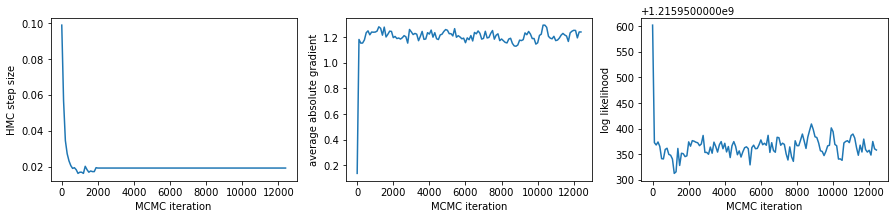

In [12]:
plt.rcParams['figure.figsize'] = [15, 3]

plt.subplot(1, 3, 1)
plt.plot(res['iter'],res['step_size'])
plt.xlabel('MCMC iteration')
plt.ylabel('HMC step size')

plt.subplot(1, 3, 2)
plt.plot(res['iter'],res['mean_abs_grad'])
plt.xlabel('MCMC iteration')
plt.ylabel('average absolute gradient')

plt.subplot(1, 3, 3)
plt.plot(res['iter'],res['logL'])
plt.xlabel('MCMC iteration')
plt.ylabel('log likelihood')

## Getting the rhat and ESS values

In [11]:
u_samples = phi_to_u(res_dict['chain_samples'])
ESS = tfp.mcmc.effective_sample_size(u_samples, cross_chain_dims = 1).numpy()
rhat = tfp.mcmc.potential_scale_reduction(res_dict['chain_samples'], independent_chain_ndims=1).numpy()
print(np.quantile(ESS, [0.5, 0.025, 0.975]))
print(np.quantile(rhat, [0.5, 0.025, 0.975]))

[ 79.1498418   24.74966311 217.76634659]
[1.06268183 1.0092529  1.40783112]


## Plotting the density of ensemble weights

NameError: name 'labels' is not defined

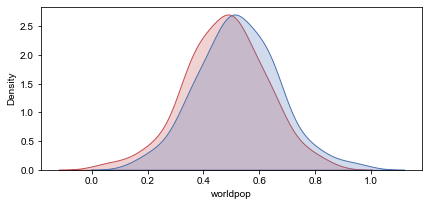

In [13]:
import seaborn as sns
#plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.figsize'] = [15, 3]
fig = plt.figure()

## The true u plot
plt.subplot(1, 2, 1)

CAR_df = pd.DataFrame(res_dict['u_true'][0,:,:], columns = res_dict['models'])
sns.set(style="darkgrid")
tt = sns.kdeplot(CAR_df['worldpop'], shade=True, color="r", label = 'worldpop')
tt = sns.kdeplot(CAR_df["pep"], shade=True, color="b", label = 'pep')
plt.ylabel(labels[pivot_DGP + 1])
plt.xlabel('')
plt.xlim(0,1)
plt.title('u true')

## The estimated u plot
CAR_ensemble_phis = tf.reduce_mean(res_dict['CAR_samples'][0], axis = 2).numpy()
u = phi_to_u(CAR_ensemble_phis, pivot = pivot_fit)
CAR_df = pd.DataFrame(u, columns = models)

plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
tt = sns.kdeplot(CAR_df['worldpop'], shade=True, color="r", label = 'worldpop')
tt = sns.kdeplot(CAR_df["pep"], shade=True, color="b", label = 'pep')
#tt = sns.kdeplot(CAR_df["worldpop"], shade=True, color="g", label = 'worldpop')
#plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,1)
plt.title('estimated u')

plt.legend()
plt.show()

## Plotting scatterplots of the fitted vs true u values and predictions vs true

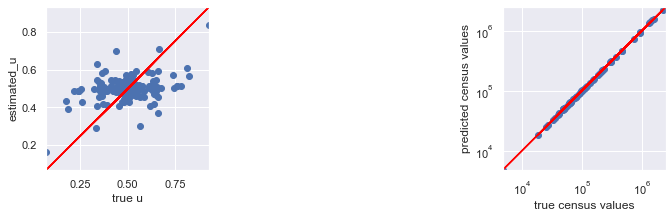

In [16]:
#plt.rcParams['figure.figsize'] = [15, 3]
fig = plt.figure()

phi = res_dict['CAR_samples'][0]

predictions = np.empty(shape=(phi.shape[0], 
                              phi.shape[2]), 
                       dtype='float64')

u = np.empty(shape = phi.shape, dtype = 'float64')
for i in range(phi.shape[2]):
    u[:,:,i] = phi_to_u(phi[:,:,i], pivot = -1)
    predictions[:,i] = tf.reduce_sum(res_dict['data'][res_dict['models']].values*u[:,:,i], axis = 1)
   # predictions[:,i] = tf.reduce_sum(data_pivot[models].values*u, axis = 1)

y_pred = np.mean(predictions, axis = 1)
    

## Make the u plot    
CAR_df = pd.DataFrame(np.mean(u, axis = 2), columns = res_dict['models'])

plt.subplot(1, 2, 1)
x = np.ndarray.flatten(res_dict['u_true'][0,:,:].numpy())
y = np.ndarray.flatten(CAR_df.values)
plt.scatter(x, y)
plt.xlabel("true u")
plt.ylabel('estimated_u')

plt.xlim([min([min(x), min(y)]), max([max(x), max(y)])])
plt.ylim([min([min(x), min(y)]), max([max(x), max(y)])])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

## obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
## add linear regression line to scatterplot 
#plt.plot(x, m*x+b, color = 'red')
## add y = x lin
plt.plot(x, x, color = 'red')

## Make the predictions plot
plt.subplot(1, 2, 2)

x = res_dict['data']['census']
y = y_pred
#y = y_pred.numpy()
plt.scatter(x, y)
plt.xlabel("true census values")
plt.ylabel("predicted census values")

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y.astype('float64'), 1)

plt.xlim([min([min(x), min(y)]), max([max(x), max(y)])])
plt.ylim([min([min(x), min(y)]), max([max(x), max(y)])])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xscale("log")
ax.set_yscale("log")

## obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
## add linear regression line to scatterplot 
#plt.plot(x, m*x+b, color = 'red')
## add y = x line
plt.plot(x, x, color = 'red')

plt.show()

## Plotting the chloroploth maps

In [ ]:
# Create the weights dict for plotting the outcomes

weights_dict = {
    "acs": CAR_ensemble_weights[:,0],
    "pep": CAR_ensemble_weights[:,1],
    "worldpop": CAR_ensemble_weights[:,2]
}

color_weights = make_color_norm(
    list(weights_dict.values())[1],   
    method="percentile")

In [ ]:
norm_weights_dict = {
    "acs": u[:,0],
    "pep": u[:,1],
    "worldpop": u[:,2]
}

color_norm_weights = make_color_norm(
    list(norm_weights_dict.values())[1],   
    method="percentile")

In [ ]:
import plotly
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})
import matplotlib.colors as colors

import plotly.express as px

In [ ]:
for model_name in models:
    output = pd.DataFrame(np.column_stack([data_sub[["GEOID"]], weights_dict[model_name]]))
    output = output.set_axis(['GEOID', model_name], axis=1)
    output[model_name] = output[model_name].astype(float)
    fig = px.choropleth_mapbox(output, geojson=counties, locations='GEOID', color=model_name,
                           color_continuous_scale="Viridis",
                           #range_color=(0.05,0.07),
                           mapbox_style="carto-positron",
                           #mapbox_style='white-bg',
                           #featureidkey="properties.MWS_ID",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5#,
                           #labels={'unemp':'unemployment rate'}
                          )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [ ]:
# pd.concat([data_NY[["GEOID"]].reset_index(drop=True), pd.DataFrame( phi_true[0].numpy(), columns = models)], axis=1)
# pd.DataFrame( phi_true[0].numpy(), columns = models)

In [ ]:
full_phi = pd.concat([data_sub[["GEOID"]].reset_index(drop=True), 
                         pd.DataFrame(phi_true[0].numpy(), columns = models)], 
                        axis=1)

full_u = pd.concat([data_sub[["GEOID"]].reset_index(drop=True), 
                         pd.DataFrame(u_true[0].numpy(), columns = models)], 
                        axis=1)


#full_phi[['GEOID', 'acs']], full_u

In [ ]:
for model_name in models:
    output = full_phi[['GEOID', model_name]]
    fig = px.choropleth_mapbox(output, geojson=counties, locations='GEOID', color=model_name,
                           color_continuous_scale="Viridis",
                           #range_color=(0.05,0.07),
                           mapbox_style="carto-positron",
                           #mapbox_style='white-bg',
                           #featureidkey="properties.MWS_ID",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5#,
                           #labels={'unemp':'unemployment rate'}
                          )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()